In [ ]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
from scipy.interpolate import interp1d
import scipy.stats as st
from numpy import nan

In [ ]:
cd/content/sample_data

/content/sample_data


In [ ]:
pp1=pd.read_csv("/content/StaritaDiarios96_2019prec.csv.csv",index_col=16,parse_dates=True)

In [ ]:
pp2=pd.read_csv("/content/datos Pza_pptacionDiaria_1996_2019.csv.csv",index_col=16,parse_dates=True)

In [ ]:
pp3=pd.read_csv("/content/datos_PptDiaria_LaCabuya_1996_2019.csv.csv",index_col=16,parse_dates=True)

In [ ]:
pp4=pd.read_csv("/content/datos_Ppt_diaria_Aguada_1996_2019.csv.csv",index_col=16,parse_dates=True)

In [ ]:
ppt1=pd.DataFrame() # Genero un DataFrame vacio
ppt1['ppt1_Dat_Falt'] = pp1['Valor'] # Capturo el valor que quiero en el DataFrame Vacio
ppt1.head()

,ppt1_Dat_Falt
Fecha,
1996-01-01,0.0
1996-01-02,0.0
1996-01-03,0.0
1996-01-04,0.0
1996-01-05,0.0


In [ ]:
ppt2=pd.DataFrame() # Genero un DataFrame vacio
ppt2['precip2'] = pp2['Valor'] # Capturo el valor que quiero en el DataFrame Vacio
ppt2.head()

,precip2
Fecha,
1996-01-01,0.0
1996-01-02,0.0
1996-01-03,0.0
1996-01-04,0.0
1996-01-05,0.0


In [ ]:
ppt3=pd.DataFrame() # Genero un DataFrame vacio
ppt3['precip3'] = pp3['Valor'] # Capturo el valor que quiero en el DataFrame Vacio
ppt3.head()

,precip3
Fecha,
1996-01-01,0.0
1996-01-02,0.5
1996-01-03,0.0
1996-01-04,0.0
1996-01-05,0.0


In [ ]:
ppt4=pd.DataFrame() # Genero un DataFrame vacio
ppt4['precip4'] = pp4['Valor'] # Capturo el valor que quiero en el DataFrame Vacio
ppt4.head()

,precip4
Fecha,
1996-01-01,0.0
1996-01-02,0.0
1996-01-03,0.0
1996-01-04,0.0
1996-01-05,0.0


In [ ]:
merged=pd.concat([ppt1,ppt2,ppt3,ppt4], axis=1)
merged.index=pd.to_datetime(merged.index)# si se requiere convertir el indice a fecha
merged['2017-10']

,ppt1_Dat_Falt,precip2,precip3,precip4
Fecha,,,,
2017-10-01,NaN,1.0,0.0,0.8
2017-10-02,NaN,0.0,0.4,0.0
2017-10-03,NaN,37.5,70.0,83.7
2017-10-04,NaN,54.7,21.3,71.2
2017-10-05,NaN,0.0,4.7,0.0
2017-10-06,NaN,15.1,0.0,8.7
2017-10-07,NaN,2.6,20.0,2.2
2017-10-08,NaN,0.0,30.0,0.0
2017-10-09,NaN,0.0,6.0,0.0


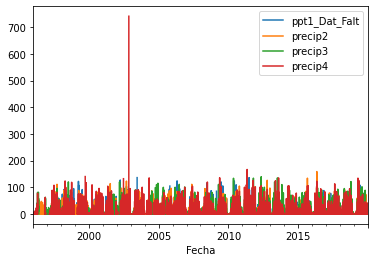

In [ ]:
merged.plot()

In [ ]:
merged.corr()

,ppt1_Dat_Falt,precip2,precip3,precip4
ppt1_Dat_Falt,1.000000,0.595578,0.253682,0.346382
precip2,0.595578,1.000000,0.290870,0.460827
precip3,0.253682,0.290870,1.000000,0.293216
precip4,0.346382,0.460827,0.293216,1.000000


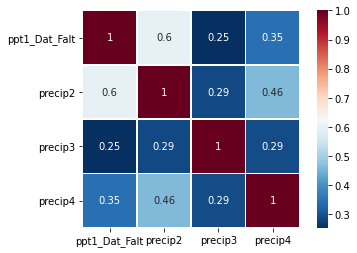

In [ ]:
import seaborn as sns
pearsoncorr=merged.corr(method='pearson')
sns.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5, square=True)
plt.savefig('PearsoncorrelationEstaciones.png', dpi=300, bbox_inches='tight')

In [ ]:
missingpp1 = merged[merged.ppt1_Dat_Falt.isnull()]
missingpp1

,ppt1_Dat_Falt,precip2,precip3,precip4
Fecha,,,,
1996-02-06,NaN,0.0,0.0,0.0
1996-02-07,NaN,0.0,0.0,0.0
1996-02-08,NaN,0.0,0.0,0.0
1996-02-09,NaN,1.0,0.0,0.0
1996-02-10,NaN,1.0,8.7,10.0
...,...,...,...,...
2017-10-29,NaN,0.0,0.1,2.0
2017-10-30,NaN,0.6,0.5,0.0
2017-10-31,NaN,0.0,0.9,0.0


In [ ]:
missingpp2 = merged[merged.precip2.isnull()]
missingpp2

,ppt1_Dat_Falt,precip2,precip3,precip4
Fecha,,,,
2001-06-08,0.0,NaN,0.0,0.0
2004-01-28,0.0,NaN,NaN,0.0
2004-02-08,NaN,NaN,NaN,0.0
2004-03-31,NaN,NaN,NaN,0.0
2010-05-24,0.0,NaN,12.1,0.0


In [ ]:
missingpp3 = merged[merged.precip3.isnull()]
missingpp3

,ppt1_Dat_Falt,precip2,precip3,precip4
Fecha,,,,
1996-06-01,NaN,17.6,NaN,NaN
1996-06-02,NaN,5.0,NaN,NaN
1996-06-03,NaN,1.4,NaN,NaN
1996-06-04,NaN,1.5,NaN,NaN
1996-06-05,NaN,2.7,NaN,NaN
...,...,...,...,...
2011-10-13,0.0,0.0,NaN,0.0
2011-10-14,0.0,0.0,NaN,1.0
2014-05-26,0.0,44.0,NaN,38.3


In [ ]:
missingpp4 = merged[merged.precip4.isnull()]
missingpp4

,ppt1_Dat_Falt,precip2,precip3,precip4
Fecha,,,,
1996-05-01,NaN,0.4,54.0,NaN
1996-05-02,NaN,66.6,24.0,NaN
1996-05-03,NaN,0.0,25.7,NaN
1996-05-04,NaN,0.0,3.5,NaN
1996-05-05,NaN,0.0,4.2,NaN
...,...,...,...,...
2015-03-28,0.0,0.0,40.0,NaN
2015-03-29,0.0,0.0,0.0,NaN
2015-03-30,0.0,0.0,1.8,NaN


In [ ]:
#Rellenar con el promedio de las otras estaciones, con 2, 3 y 4 rellenar 1, revisar como mejorar el codigo para que el 3 sea el conteo del valor de cada estacion para que no siempre divida en 3
filled=(missingpp1.precip2+missingpp1.precip3+missingpp1.precip4)/(missingpp1.shape[-1]-1)
missingpp1.ppt1_Dat_Falt=filled
filled

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


Fecha
1996-02-06     0.000000
1996-02-07     0.000000
1996-02-08     0.000000
1996-02-09     0.333333
1996-02-10     6.566667
                ...    
2017-10-29     0.700000
2017-10-30     0.366667
2017-10-31     0.300000
2019-08-10    19.300000
2019-08-11     8.300000
Length: 798, dtype: float64

In [ ]:
# En merged 2 sale el promedio de los datos faltantes en 0, hay que unir ese promedio en el excel
merged2=pd.concat([ppt1,ppt2,ppt3,ppt4,filled ], axis=1)
merged2.index=pd.to_datetime(merged.index)# si se requiere convertir el indice a fecha
merged2

,ppt1_Dat_Falt,precip2,precip3,precip4,0
Fecha,,,,,
1996-01-01,0.0,0.0,0.0,0.0,NaN
1996-01-02,0.0,0.0,0.5,0.0,NaN
1996-01-03,0.0,0.0,0.0,0.0,NaN
1996-01-04,0.0,0.0,0.0,0.0,NaN
1996-01-05,0.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...
2019-12-27,0.0,0.0,0.0,2.0,NaN
2019-12-28,0.0,0.0,0.0,3.0,NaN
2019-12-29,3.7,5.0,12.0,0.0,NaN


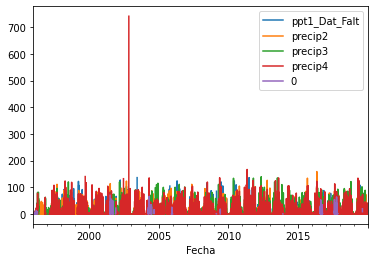

In [169]:
merged2.plot()

In [ ]:
merged2.to_excel('/content/sample_data/filledData.xls')

In [166]:
# Otra forma es rellenarlo con los datos de la estacion que mas tiene relacion en este caso prec 2 de acuerdo al analisis de datos
resultadorelleno=merged2['ppt1_Dat_Falt'].fillna(merged2['precip2'])

In [171]:
resultadorelleno['1996-02']

Fecha
1996-02-01    0.0
1996-02-02    0.0
1996-02-03    0.0
1996-02-04    0.0
1996-02-05    0.0
1996-02-06    0.0
1996-02-07    0.0
1996-02-08    0.0
1996-02-09    1.0
1996-02-10    1.0
1996-02-11    0.0
1996-02-12    5.0
1996-02-13    0.0
1996-02-14    0.0
1996-02-15    0.0
1996-02-16    1.0
1996-02-17    0.0
1996-02-18    0.0
1996-02-19    0.0
1996-02-20    0.0
1996-02-21    0.0
1996-02-22    0.0
1996-02-23    0.0
1996-02-24    0.0
1996-02-25    0.0
1996-02-26    2.0
1996-02-27    0.0
1996-02-28    0.0
1996-02-29    0.0
Freq: D, Name: ppt1_Dat_Falt, dtype: float64

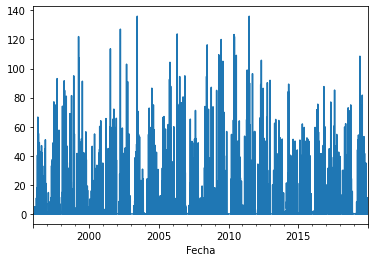

In [168]:
resultadorelleno.plot()

In [170]:
resultadorelleno.to_excel('/content/sample_data/RellenoConLaEstacionMasRelacionadaStaRita.xls')

In [ ]:
# rellenado con otro metodo, el de la relacion normal que tiene en cuenta la precipitación anual normal difiere de la interpolacion en mas del 10%, se pondera por las proporciones de precipitacion anuales
merged['year']=merged.index.year
grouped=merged.groupby('year').sum()
grouped

,ppt1_Dat_Falt,precip2,precip3,precip4
year,,,,
1996,337.8,1577.1,1861.1,467.7
1997,1369.9,1697.4,2380.7,1984.1
1998,1805.2,1759.2,2689.1,2881.5
1999,1654.6,2463.4,124.8,2412.3
2000,1635.4,1845.9,2492.0,2654.6
2001,1038.7,1698.3,2808.7,2500.7
2002,1728.8,2208.9,2395.9,3205.7
2003,1307.3,1982.9,1254.6,2232.2
2004,261.6,2191.1,2647.8,1721.6


In [ ]:
missingpp1

,ppt1_Dat_Falt,precip2,precip3,precip4
Fecha,,,,
1996-02-06,0.000000,0.0,0.0,0.0
1996-02-07,0.000000,0.0,0.0,0.0
1996-02-08,0.000000,0.0,0.0,0.0
1996-02-09,0.333333,1.0,0.0,0.0
1996-02-10,6.566667,1.0,8.7,10.0
...,...,...,...,...
2017-10-29,0.700000,0.0,0.1,2.0
2017-10-30,0.366667,0.6,0.5,0.0
2017-10-31,0.300000,0.0,0.9,0.0


In [ ]:
# rellenado con otro metodo, el de la relacion normal que tiene en cuenta la precipitación anual normal difiere de la interpolacion en mas del 10%, se pondera por las proporciones de precipitacion anuales(Revisar)
# Revisar porque dede dar valores similares al metodo anterior
a=grouped.ppt1_Dat_Falt.mean()
b=missingpp1.precip2/grouped.precip2.mean()
c=missingpp1.precip3/grouped.precip3.mean()
d=missingpp1.precip4/grouped.precip4.mean()
filled=a*(b+c+d)/(missingpp1.shape[-1]-1)
filled.tail()

Fecha
2017-10-29     0.466625
2017-10-30     0.264686
2017-10-31     0.186848
2019-08-10    12.637608
2019-08-11     6.221095
dtype: float64

In [ ]:
grouped.ppt1_Dat_Falt.mean()

1621.075

In [ ]:
(missingpp1.shape[-1]-1)

3

In [ ]:
# Otro metodo No lineal
ppf=merged['2018']
ppf.head

<bound method NDFrame.head of             ppt1_Dat_Falt  precip2  precip3  precip4  year
Fecha                                                     
2018-01-01           39.5      5.0     20.0      8.4  2018
2018-01-02            4.4     22.6     41.1     25.0  2018
2018-01-03            0.0      0.0     10.3      3.2  2018
2018-01-04            0.0      0.0      0.3      0.0  2018
2018-01-05            0.0      0.0      0.0      0.0  2018
...                   ...      ...      ...      ...   ...
2018-12-27            0.0      0.0      0.0      0.0  2018
2018-12-28            0.0      0.0      0.0      0.0  2018
2018-12-29            0.0      0.0      0.0      0.0  2018
2018-12-30            0.0      0.0      0.0      0.0  2018
2018-12-31            0.0      0.0      0.0      0.0  2018

[365 rows x 5 columns]>

In [ ]:
ppf2=ppf[ppf.	ppt1_Dat_Falt.notna()]  # Los valores que no son nulos son iguales a ppf2
ppf2.head()

,ppt1_Dat_Falt,precip2,precip3,precip4,year
Fecha,,,,,
2018-01-01,39.5,5.0,20.0,8.4,2018
2018-01-02,4.4,22.6,41.1,25.0,2018
2018-01-03,0.0,0.0,10.3,3.2,2018
2018-01-04,0.0,0.0,0.3,0.0,2018
2018-01-05,0.0,0.0,0.0,0.0,2018


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
mlr= LinearRegression()

In [ ]:
mlr.fit(ppf2[['precip2', 'precip3','precip4']], ppf2['ppt1_Dat_Falt']) # Para que funcione las estaciones 2,3 y 4 no deben tener valores vacios, por eso este ejemplo se realizo con el anio 2018

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print(mlr.intercept_)
print(mlr.coef_)

0.9760982761454366
[0.49823535 0.02290146 0.20146449]


In [ ]:
Inter=mlr.intercept_
a2,a3,a4=mlr.coef_
a2,a3,a4,mlr.intercept_

(0.49823535308693284,
 0.022901463903256314,
 0.20146448682075926,
 0.9760982761454366)

In [ ]:
missingValuesppt1=ppf[ppf.ppt1_Dat_Falt.isnull()]

In [ ]:
# Revisar ya que no arroja los valores ajustados
Relleno=Inter+missingpp1.precip2*a2+missingpp1.precip3*a3+missingpp1.precip4*a4
Relleno['2017']


Fecha
2017-08-01    0.976098
2017-08-02    1.136409
2017-08-03    9.485884
2017-08-04    3.687888
2017-08-05    1.205113
                ...   
2017-10-27    1.040222
2017-10-28    2.950048
2017-10-29    1.381317
2017-10-30    1.286490
2017-10-31    0.996710
Length: 92, dtype: float64

In [ ]:
LinearRegression?